In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
 
import missingno as msno

In [2]:
medidos = pd.read_csv('../data/weekends.csv',index_col=0,parse_dates=True,names=['tiempo','Ti'],skiprows=1) 
medidos

,Ti
tiempo,
2019-06-08 00:00:00,25.348056
2019-06-08 00:00:20,25.354979
2019-06-08 00:00:40,25.359593
2019-06-08 00:01:00,25.348056
2019-06-08 00:01:20,25.351517
...,...
2019-07-28 23:58:20,24.798895
2019-07-28 23:58:40,24.802356
2019-07-28 23:59:00,24.673142


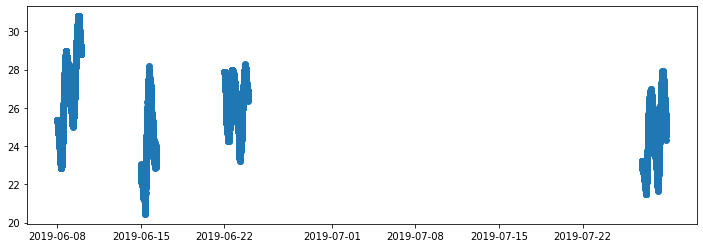

In [3]:
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(medidos.index,medidos.Ti)

In [6]:
eplus = pd.read_csv('../idf/horario_02/horario_02.csv',names=['tiempo','equipo','Ti_s'],skiprows=1)
eplus.tiempo = eplus.tiempo.str.replace('24:00:00','23:59:59')
eplus.tiempo = '2019 ' + eplus.tiempo
eplus.tiempo = pd.to_datetime(eplus.tiempo,format='%Y %m/%d %H:%M:%S')
eplus.set_index('tiempo',inplace=True)
del eplus['equipo']
eplus

,Ti_s
tiempo,
2019-01-01 00:10:00,27.012219
2019-01-01 00:20:00,26.986947
2019-01-01 00:30:00,26.960868
2019-01-01 00:40:00,26.933980
2019-01-01 00:50:00,26.906333
...,...
2019-12-31 23:20:00,27.359864
2019-12-31 23:30:00,27.339472
2019-12-31 23:40:00,27.317542


In [7]:
compara  = pd.concat([medidos,eplus],axis=1)
compara

,Ti,Ti_s
tiempo,,
2019-01-01 00:10:00,NaN,27.012219
2019-01-01 00:20:00,NaN,26.986947
2019-01-01 00:30:00,NaN,26.960868
2019-01-01 00:40:00,NaN,26.933980
2019-01-01 00:50:00,NaN,26.906333
...,...,...
2019-12-31 23:20:00,NaN,27.359864
2019-12-31 23:30:00,NaN,27.339472
2019-12-31 23:40:00,NaN,27.317542


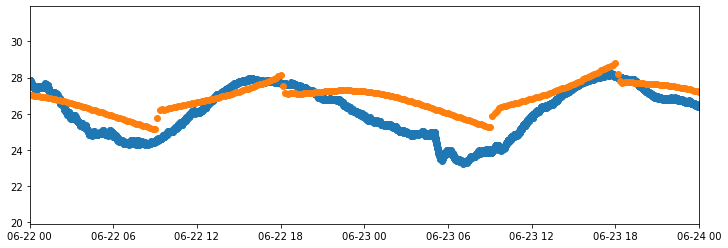

In [8]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-22')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti)
ax.scatter(compara.index,compara.Ti_s)
fin1 = compara[fecha1:fecha2]

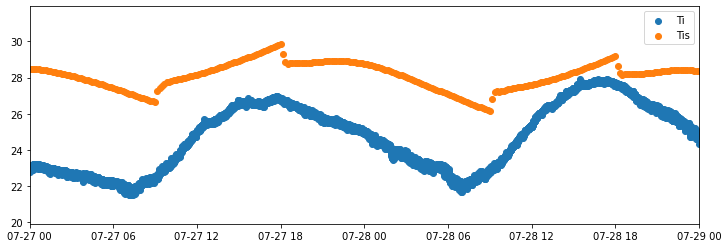

In [14]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-07-27')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara.index,compara.Ti,label='Ti')
ax.scatter(compara.index,compara.Ti_s,label='Tis')
ax.legend()

fin2 = compara[fecha1:fecha2]

In [ ]:
msno.matrix(compara)

In [16]:
analisis = pd.concat([fin1,fin2],axis=0)
analisis

,Ti,Ti_s
tiempo,,
2019-06-22 00:00:00,27.865430,NaN
2019-06-22 00:00:20,27.861969,NaN
2019-06-22 00:00:40,27.873506,NaN
2019-06-22 00:01:00,27.855047,NaN
2019-06-22 00:01:20,27.873506,NaN
...,...,...
2019-07-28 23:58:40,24.802356,NaN
2019-07-28 23:59:00,24.673142,NaN
2019-07-28 23:59:20,24.567001,NaN


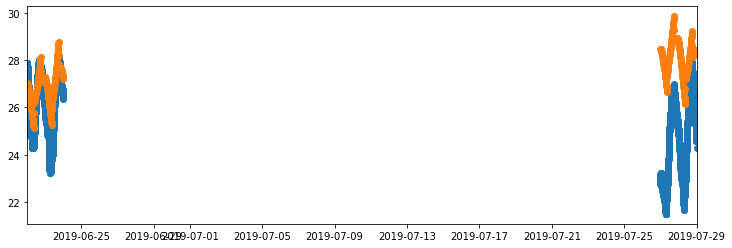

In [27]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-22')
fecha2 = fecha1 + pd.Timedelta('37D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(analisis.index,analisis.Ti)
ax.scatter(analisis.index,analisis.Ti_s)


In [26]:
analisis.sort_index(inplace=True)

In [28]:
analisis.to_csv('../data/analisis.csv')